# Linear Regression with Scikit-Learn

## Object :

#### we will use scikit learn for building a linear regression model using gradient descent .

## Importing the libiraries :

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# SGDRegressor is a model that use the gradient descent :
from sklearn.linear_model import SGDRegressor
# importing the function that noormalize the X using the Z score normalistion
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

## Gradient descent 

Scikit learn provides a linear model using the gradient descent `sklearn.linear_model.SGDRegressor`.
this model is the same compared by the last implimentation 

This model given the best results with one condition , is to normalize the data !!!

## Importing Data :


In [4]:
def load_data():
    data = np.loadtxt(r"C:\Users\hp\Documents\Apprentissage Automatique\houses.txt", delimiter=',', skiprows=1)#skiprows : to skip the first row !
    X = data[:, :4]
    Y = data[:, 4]
    return X, Y

In [8]:
X_train, Y_train = load_data()
X_features = ['size(sqft)','bedrooms','floors','age']

## Normalization :

In [10]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_normalized,axis=0)}")

Peak to Peak range by column in Raw X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


## Create the model :


In [11]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_normalized, Y_train)
print(sgdr)
print(f"the number of iterations completed  : {sgdr.n_iter_}, number of weight updates : {sgdr.t_}")

SGDRegressor()
the number of iterations completed  : 119, number of weight updates : 11782.0


## Displaying the parameters :

In [12]:
w_normal = sgdr.coef_
b_normal = sgdr.intercept_
print(f'model parameters : {w_normal}                        and  {b_normal}')

model parameters : [110.09 -21.   -32.42 -38.09]                        and  [363.16]


## Prediction :

In [13]:
predictions = sgdr.predict(X_normalized)
# make a prediction using w,b.
y_pred = np.dot(X_normalized, w_normal) + b_normal
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == predictions).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{Y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.16 485.96 389.65 492.13]
Target values 
[300.  509.8 394.  540. ]


## The global syntax 

sklearn.linear_model.SGDRegressor(
    
    loss='squared_error', 
    
    penalty=None, 
    
    alpha=0.0001, 
    
    l1_ratio=0.15, 
    
    fit_intercept=True, 
    
    max_iter=1000, 
    
    tol=1e-3, 
    
    shuffle=True, 
    
    verbose=0, 
    
    epsilon=0.1, 
    
    random_state=None, 
    
    learning_rate='invscaling', 
    
    eta0=0.01, 
    
    power_t=0.25, 
    
    early_stopping=False, 
    
    validation_fraction=0.1, 
    
    n_iter_no_change=5, 
    
    warm_start=False, 
    
    average=False
)


## Parameter descriptions:

- loss: Specifies the loss function. Default is 'squared_error' (which corresponds to Ordinary Least Squares regression).

- Options: 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'.
- penalty: Regularization term. Default is None (no regularization).Options: 'l2', 'l1', 'elasticnet'.
- alpha: Constant that multiplies the regularization term. Default is 0.0001. Higher values reduce model complexity.

- l1_ratio: ElasticNet mixing parameter (used if penalty='elasticnet'), with 0 <= l1_ratio <= 1. Default is 0.15.

- fit_intercept: Whether to calculate the intercept for the model. Default is True.

- max_iter: Maximum number of iterations. Default is 1000.

- tol: Stopping criterion tolerance. Default is 1e-3.

- shuffle: Whether to shuffle training data before each epoch. Default is True.

- verbose: Controls the verbosity of the output. Default is 0 (silent).

- epsilon: Epsilon in the epsilon-insensitive loss function, used only if the loss function is 'huber', 'epsilon_insensitive', or'squared_epsilon_insensitive'. Default is 0.1.

- random_state: Seed for random number generation. Default is None.

- learning_rate: The learning rate schedule.Options: 'constant', 'optimal', 'invscaling', 'adaptive'.
- eta0: The initial learning rate for the 'constant', 'invscaling', or 'adaptive' schedules. Default is 0.01.

- power_t: The exponent for inverse scaling learning rate (learning_rate='invscaling'). Default is 0.25.

- early_stopping: Whether to use early stopping to terminate training when validation score doesn’t improve. Default is False.

- validation_fraction: Proportion of training data used for validation if early_stopping=True. Default is 0.1.

- n_iter_no_change: Number of iterations with no improvement to wait before stopping when using early stopping. Default is 5.

- warm_start: Reuse the solution of the previous call to fit as initialization. Default is False.

- average: If True, computes the averaged SGD weights across all updates. Default is False.

## Visualising the results :

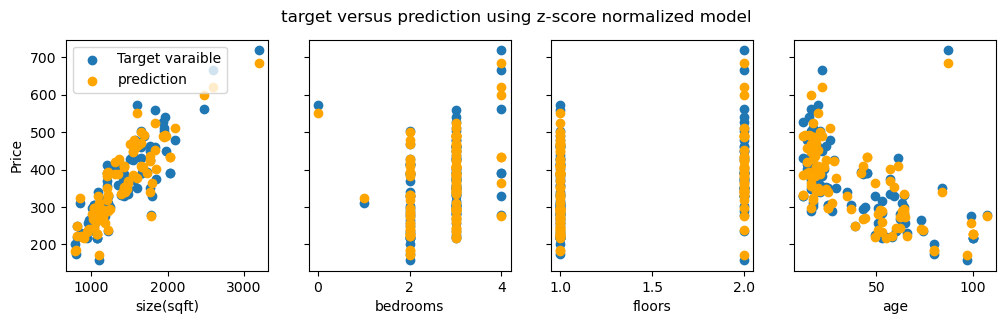

In [19]:
figure, axe = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(axe)):
    axe[i].scatter(X_train[:, i], Y_train, label='Target varaible')
    axe[i].set_xlabel(X_features[i])
    axe[i].scatter(X_train[:, i], predictions, color='orange', label='prediction')
axe[0].set_ylabel("Price")
axe[0].legend()
figure.suptitle("target versus prediction using z-score normalized model")
plt.show()